In [ ]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot( 
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

In [ ]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

In [ ]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

In [ ]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

In [ ]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

/Users/larsmoan/Documents/UQ/INFS4203/infs4203/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/larsmoan/Documents/UQ/INFS4203/infs4203/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/larsmoan/Documents/UQ/INFS4203/infs4203/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/larsmoan/Documents/UQ/INFS4203/infs4203/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureW

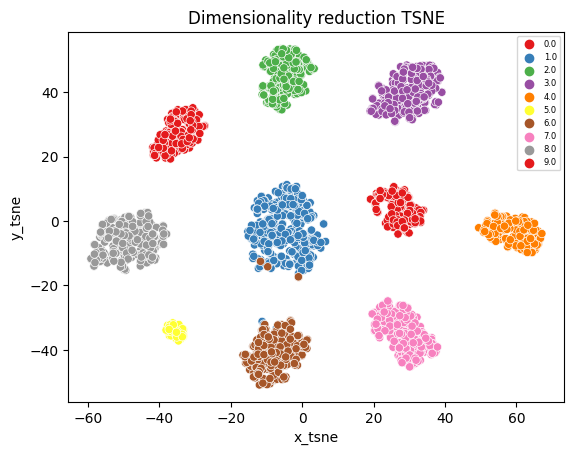

,Num_Col_0,Num_Col_1,Num_Col_2,Num_Col_3,Num_Col_4,Num_Col_5,Num_Col_6,Num_Col_7,Num_Col_8,Num_Col_9,...,Cat_Col_121,Cat_Col_122,Cat_Col_123,Cat_Col_124,Cat_Col_125,Cat_Col_126,Cat_Col_127,Label,x_tsne,y_tsne
0,0.025521,1.000000,0.438425,0.117955,0.614838,0.419088,0.100474,0.054482,0.923201,0.420384,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,49.415367,-2.073458
1,0.112504,0.902892,0.373126,0.218786,0.556747,0.396100,0.206102,0.226375,0.928163,0.462473,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0,55.458988,-2.885847
2,0.105889,0.894474,0.358209,0.215833,0.560190,0.413467,0.212144,0.244895,0.904652,0.469341,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0,61.207424,-5.337049
3,0.140521,0.887579,0.320544,0.226698,0.567866,0.409446,0.197077,0.199802,0.869616,0.457487,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0,60.640579,-4.567187
4,0.105756,0.910594,0.499889,0.228864,0.618167,0.383648,0.137480,0.145209,0.904837,0.504052,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0,51.744640,-1.399226


In [1]:
from sklearn.manifold import TSNE
from dataset import *
dset = INFS4203Dataset('train.csv', impute_nans=impute_values)
dset.addTSNE(plot_result=True)

dset.df.head()

In [7]:
df_numeric = dset.df.drop(dset.non_numerical_cols, axis=1)

m = TSNE(learning_rate=2)
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

(2180, 2)


/Users/larsmoan/Documents/UQ/INFS4203/infs4203/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/larsmoan/Documents/UQ/INFS4203/infs4203/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/larsmoan/Documents/UQ/INFS4203/infs4203/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='x_tsne', ylabel='y_tsne'>

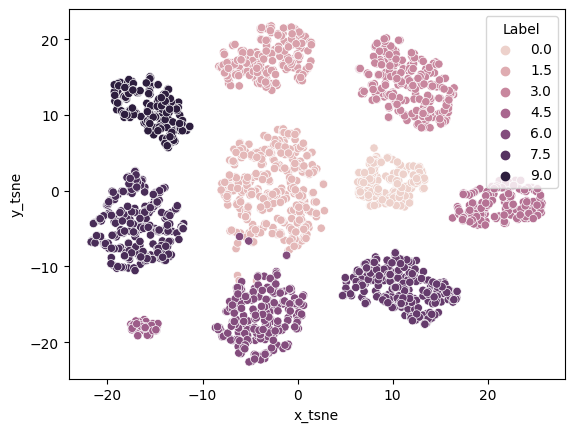

In [8]:
dset.df['x_tsne'] = tsne_features[:, 0]
dset.df['y_tsne'] = tsne_features[:, 1]
sns.scatterplot(x='x_tsne', y='y_tsne', hue='Label', data=dset.df)